<a href="https://colab.research.google.com/github/Mmbsaksd/DeepLearning-/blob/main/GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler

In [2]:
#Loading Datasets
df = pd.read_csv('/content/Churn_Modelling.csv')

#Dividing the data into features and target
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [3]:
#Viewing the data of first 5 row
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Encoding the catagoriacal data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
x['Geography'] = label_encoder.fit_transform(x['Geography'])
x['Gender'] = label_encoder.fit_transform(x['Gender'])
ohe = OneHotEncoder()
x = ohe.fit_transform(x).toarray()
x = x[:,1:]



In [5]:
#Splitting the data set into traning and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [6]:
#Featuring scalling with standard scalar
from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [7]:
# Importing Library of KerasClassifier and GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
#Defining the Neural Network
def create_model(layers,activations):
  model = Sequential()
  for i, nodes in enumerate(layers):
    if i ==0:
      model.add(Dense(nodes, input_dim=xtrain.shape[1]))
      model.add(Activation(activations))

    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
  model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [26]:
#Creating the KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [27]:
#Tuning the model with GridSearchCV
layers = [[20],[40,20],[45,30,15]]
activation = ['sigmoid','relu']
param_grid = dict(layers =layers, activations = activation, batch_size = [128,256], epochs = [30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)


In [22]:
#Fitting the GridSearchCV
gridcv = grid.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.buil

In [24]:
#Printing the best params and best score
[gridcv.best_score_,gridcv.best_params_]

[0.4876249969005585,
 {'activations': 'relu', 'batch_size': 256, 'epochs': 30, 'layers': [20]}]

In [35]:
#Predicting xtest
ypred = gridcv.predict(xtest)
ypred = (ypred>0.5)
ypred


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

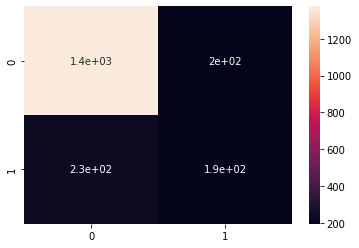

In [34]:
#Finding the confusion metrics and plotting in heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ypred, ytest)
import seaborn as sns
sns.heatmap(cm,annot=True)